# Important Library, Dataset & Profiling

In [1]:
#importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Setting path for saving images

from pathlib import Path
IMAGES_PATH = Path() / "Diagrams"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Reading Dataset

In [3]:
# Reading the Dataset

df = pd.read_csv("../Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Applying Profiling

In [4]:
 #Applying Profiling for Data Preprocessing
#!pip install ydata-profiling
#!pip install ydata-profiling[notebook]

from ydata_profiling import ProfileReport
prof = ProfileReport(df, title="Employee Attrition Dataset Profile Report")
prof.to_file(output_file='Dataset Profile.html')

ModuleNotFoundError: No module named 'ydata_profiling'

# Exploratory Data Analysis (EDA) and visualization

### Target Variable Analysis (Attrition) 

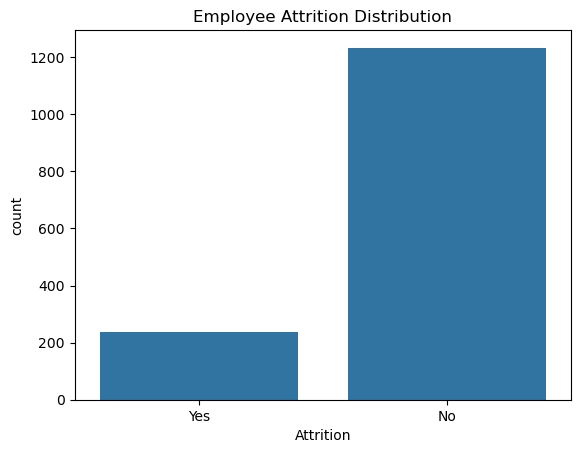

In [5]:
sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Distribution')
plt.savefig(IMAGES_PATH / 'Target Distribution' / 'attrition_distribution.png')
plt.show()


### Categorical Feature Distributions 

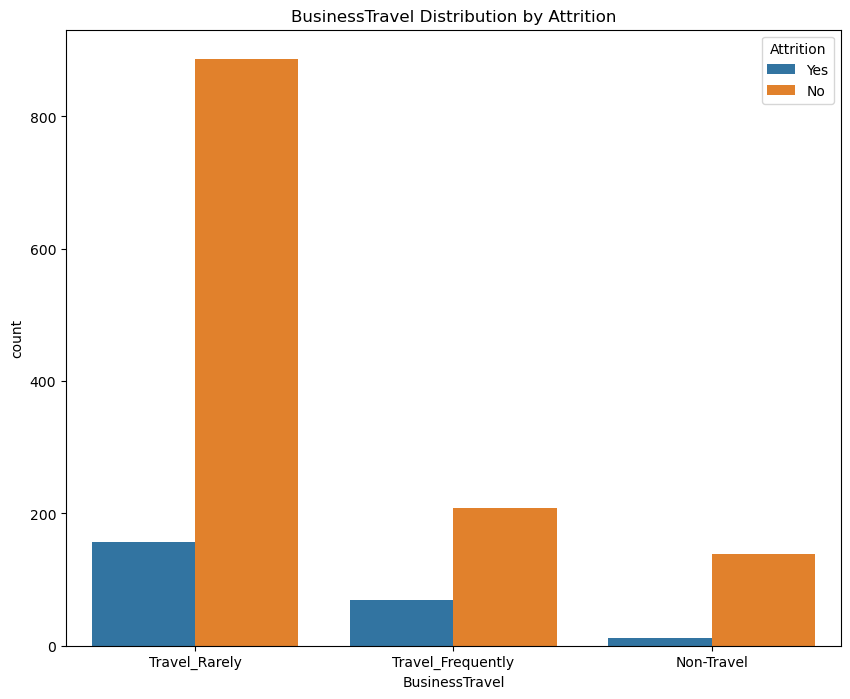

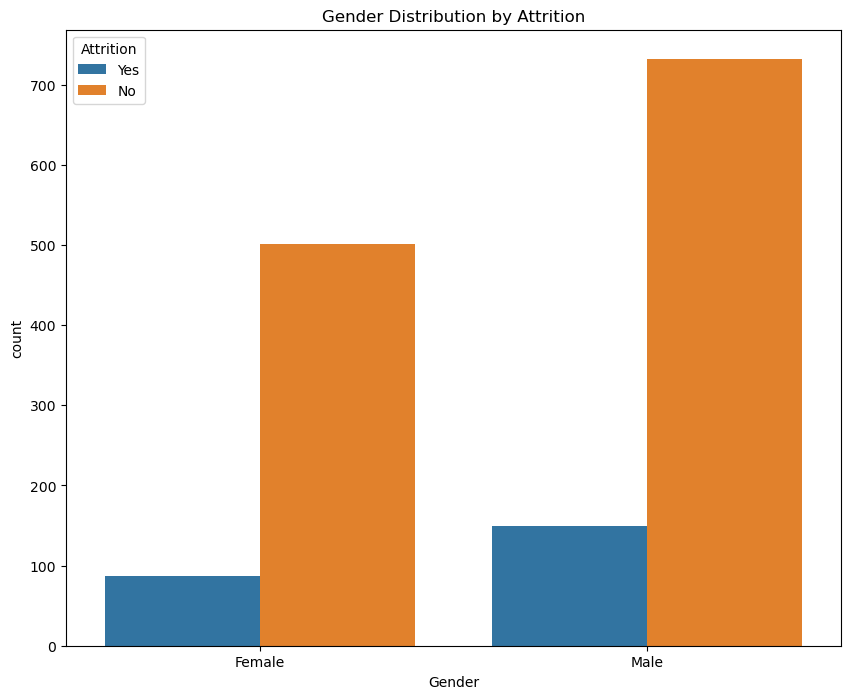

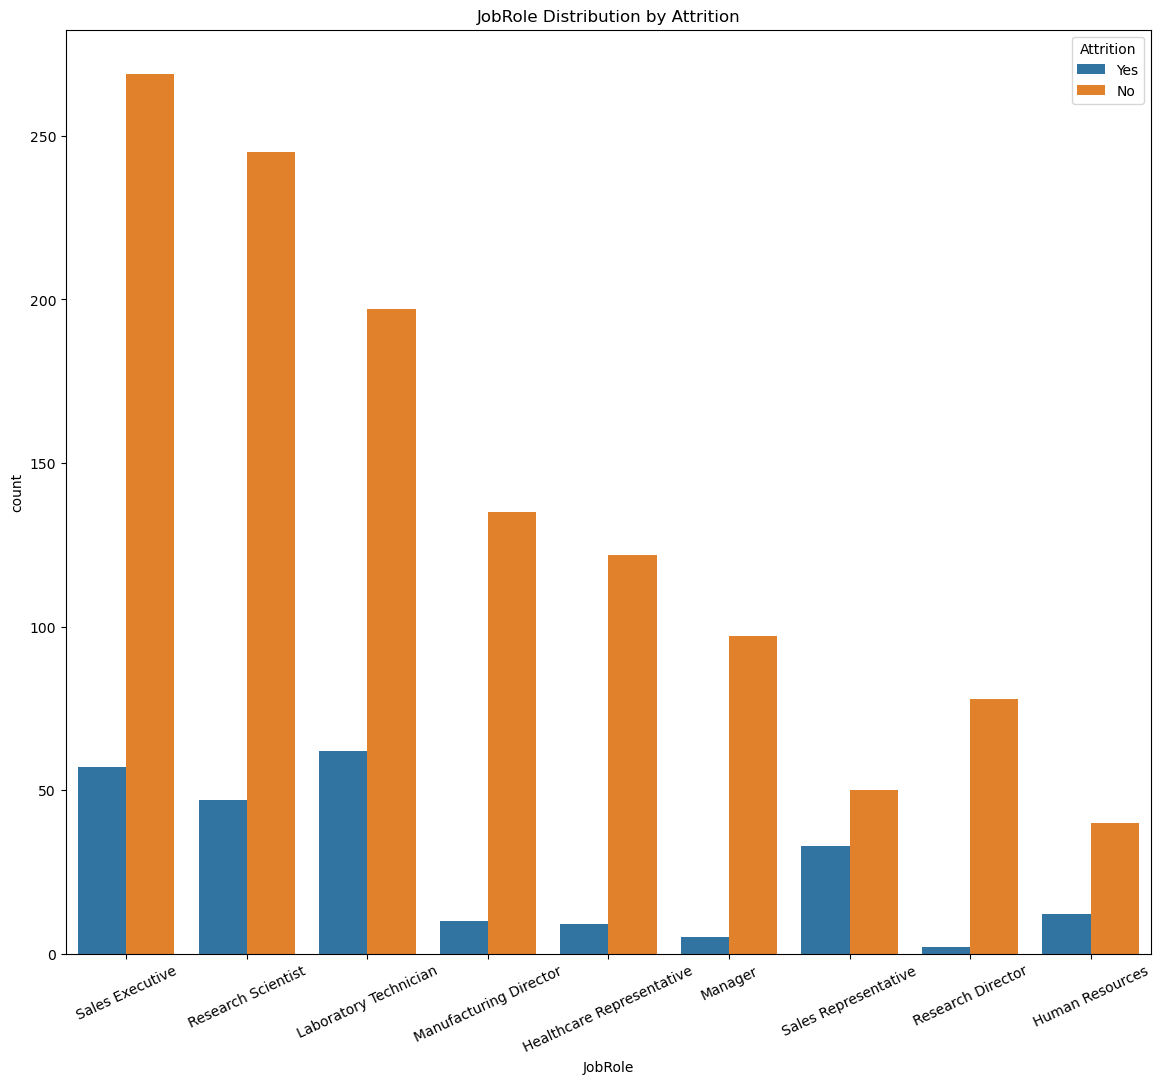

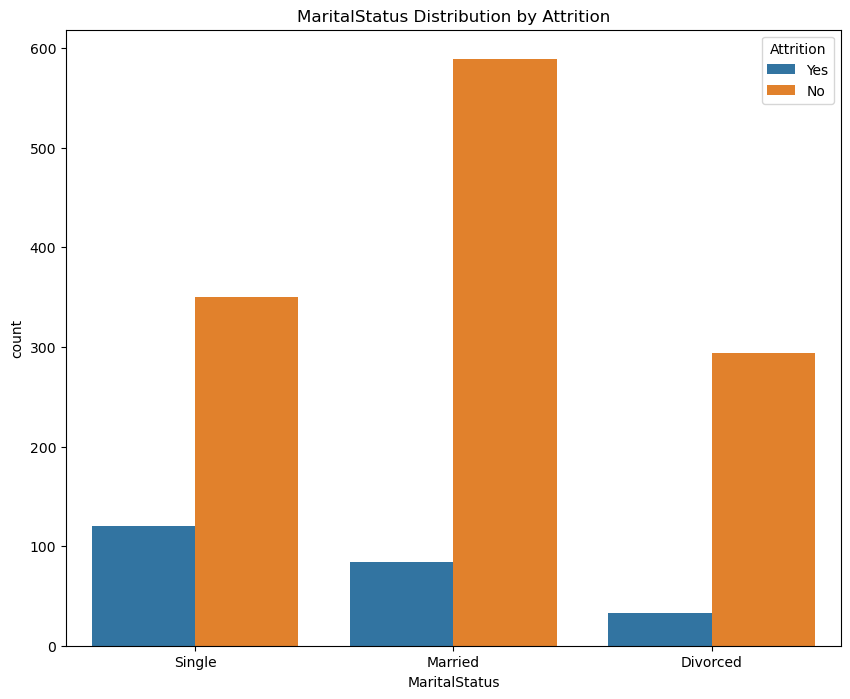

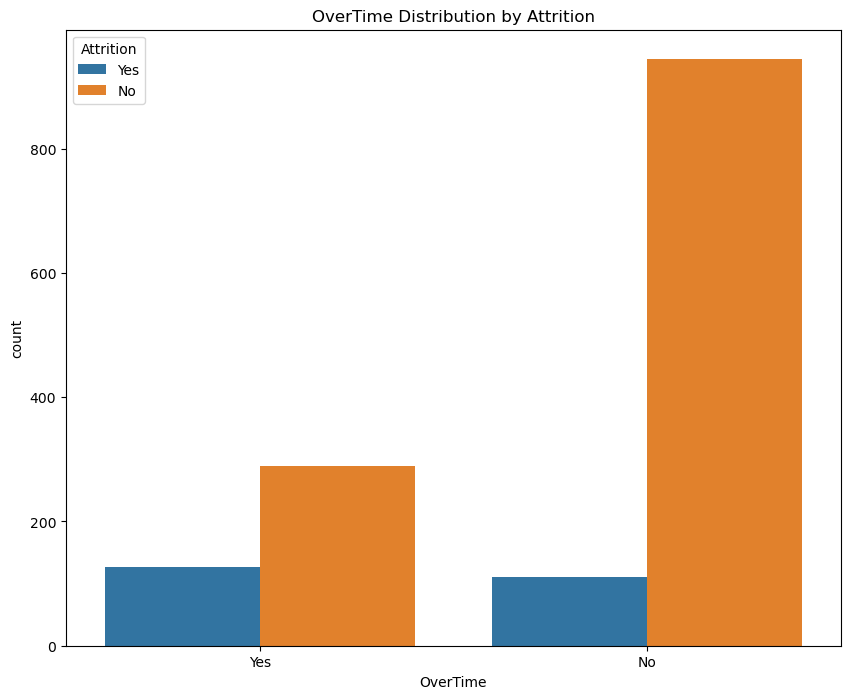

In [6]:
categorical_features = ['BusinessTravel', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for feature in categorical_features:
    if feature == 'JobRole':
        plt.figure(figsize=(14,12))  
        plt.xticks(rotation=25)
    else:
        plt.figure(figsize=(10,8))
        plt.xticks(rotation=0)
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(f'{feature} Distribution by Attrition')
    plt.savefig(IMAGES_PATH / 'Catagorical Distribution' / f'{feature}_attrition.png')
    plt.show()


### Numerical Feature Distributions 

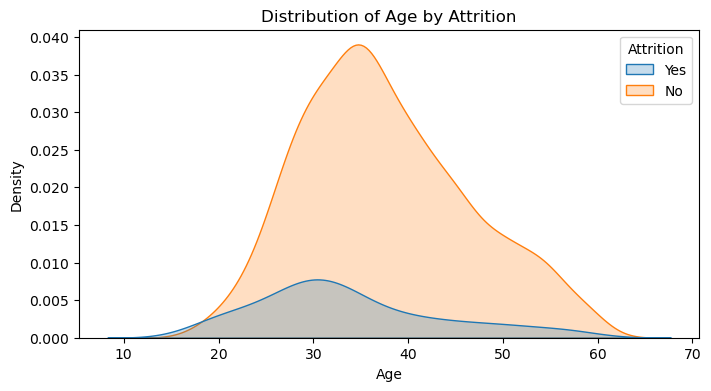

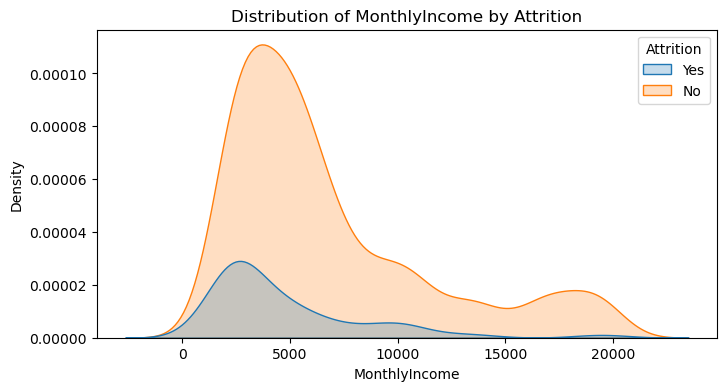

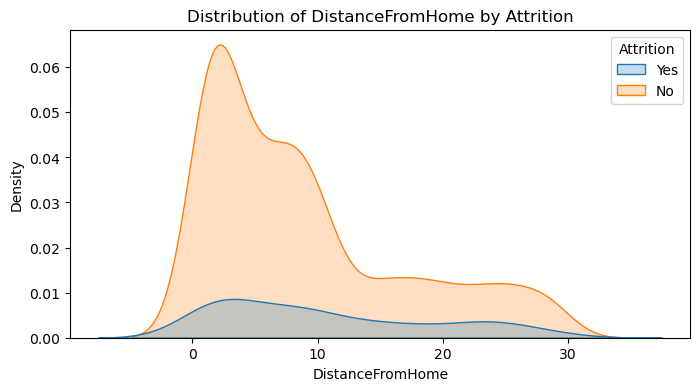

In [7]:
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='Attrition', fill=True)
    plt.title(f'Distribution of {feature} by Attrition')
    plt.savefig(IMAGES_PATH / 'Numerical Distribution' / f'{feature}_attrition_dist.png')
    plt.show()


### Correlation Heatmap 

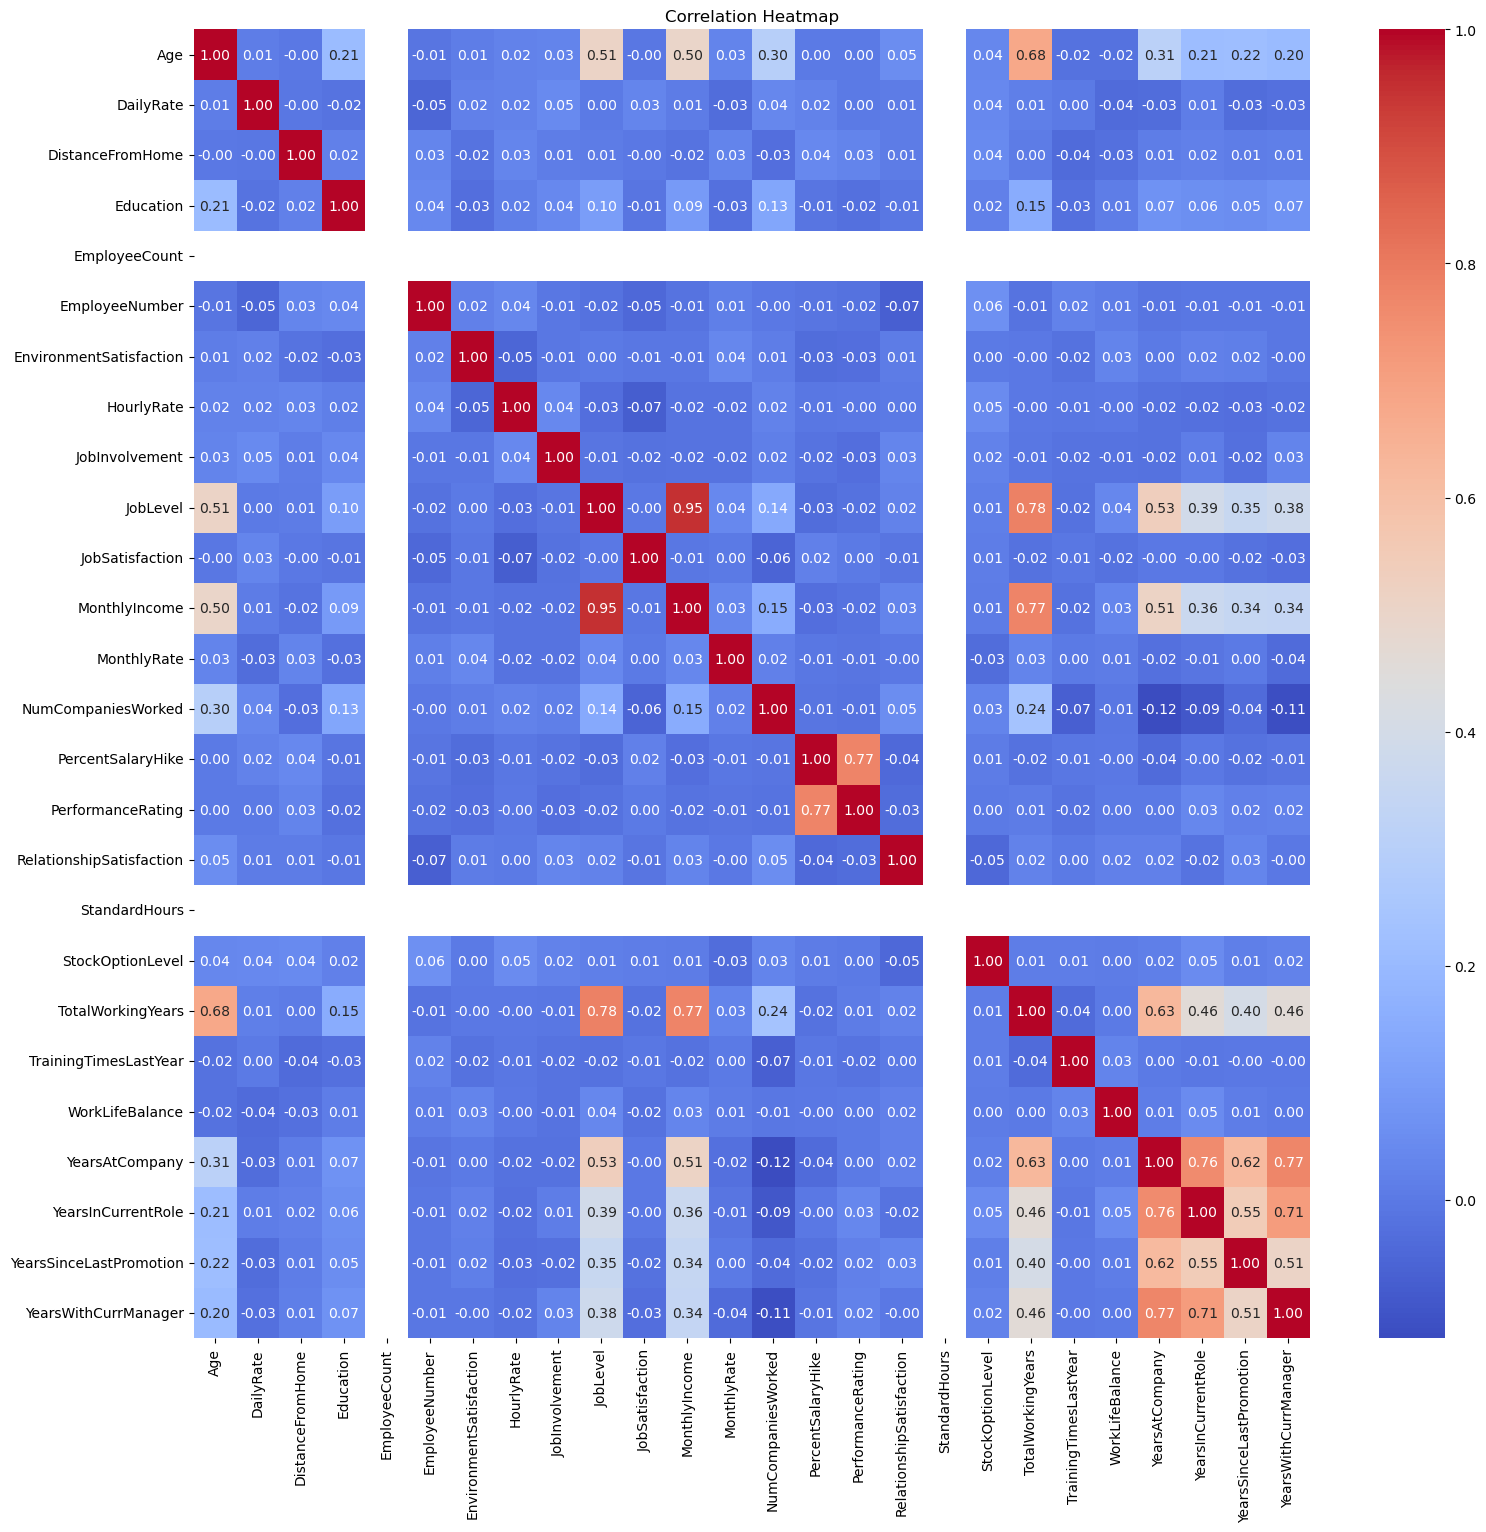

In [8]:
plt.figure(figsize=(18,17))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig(IMAGES_PATH / 'Correlation Heatmap' / 'correlation_heatmap.png')
plt.show()


### PairPlot/ ScatterPlot

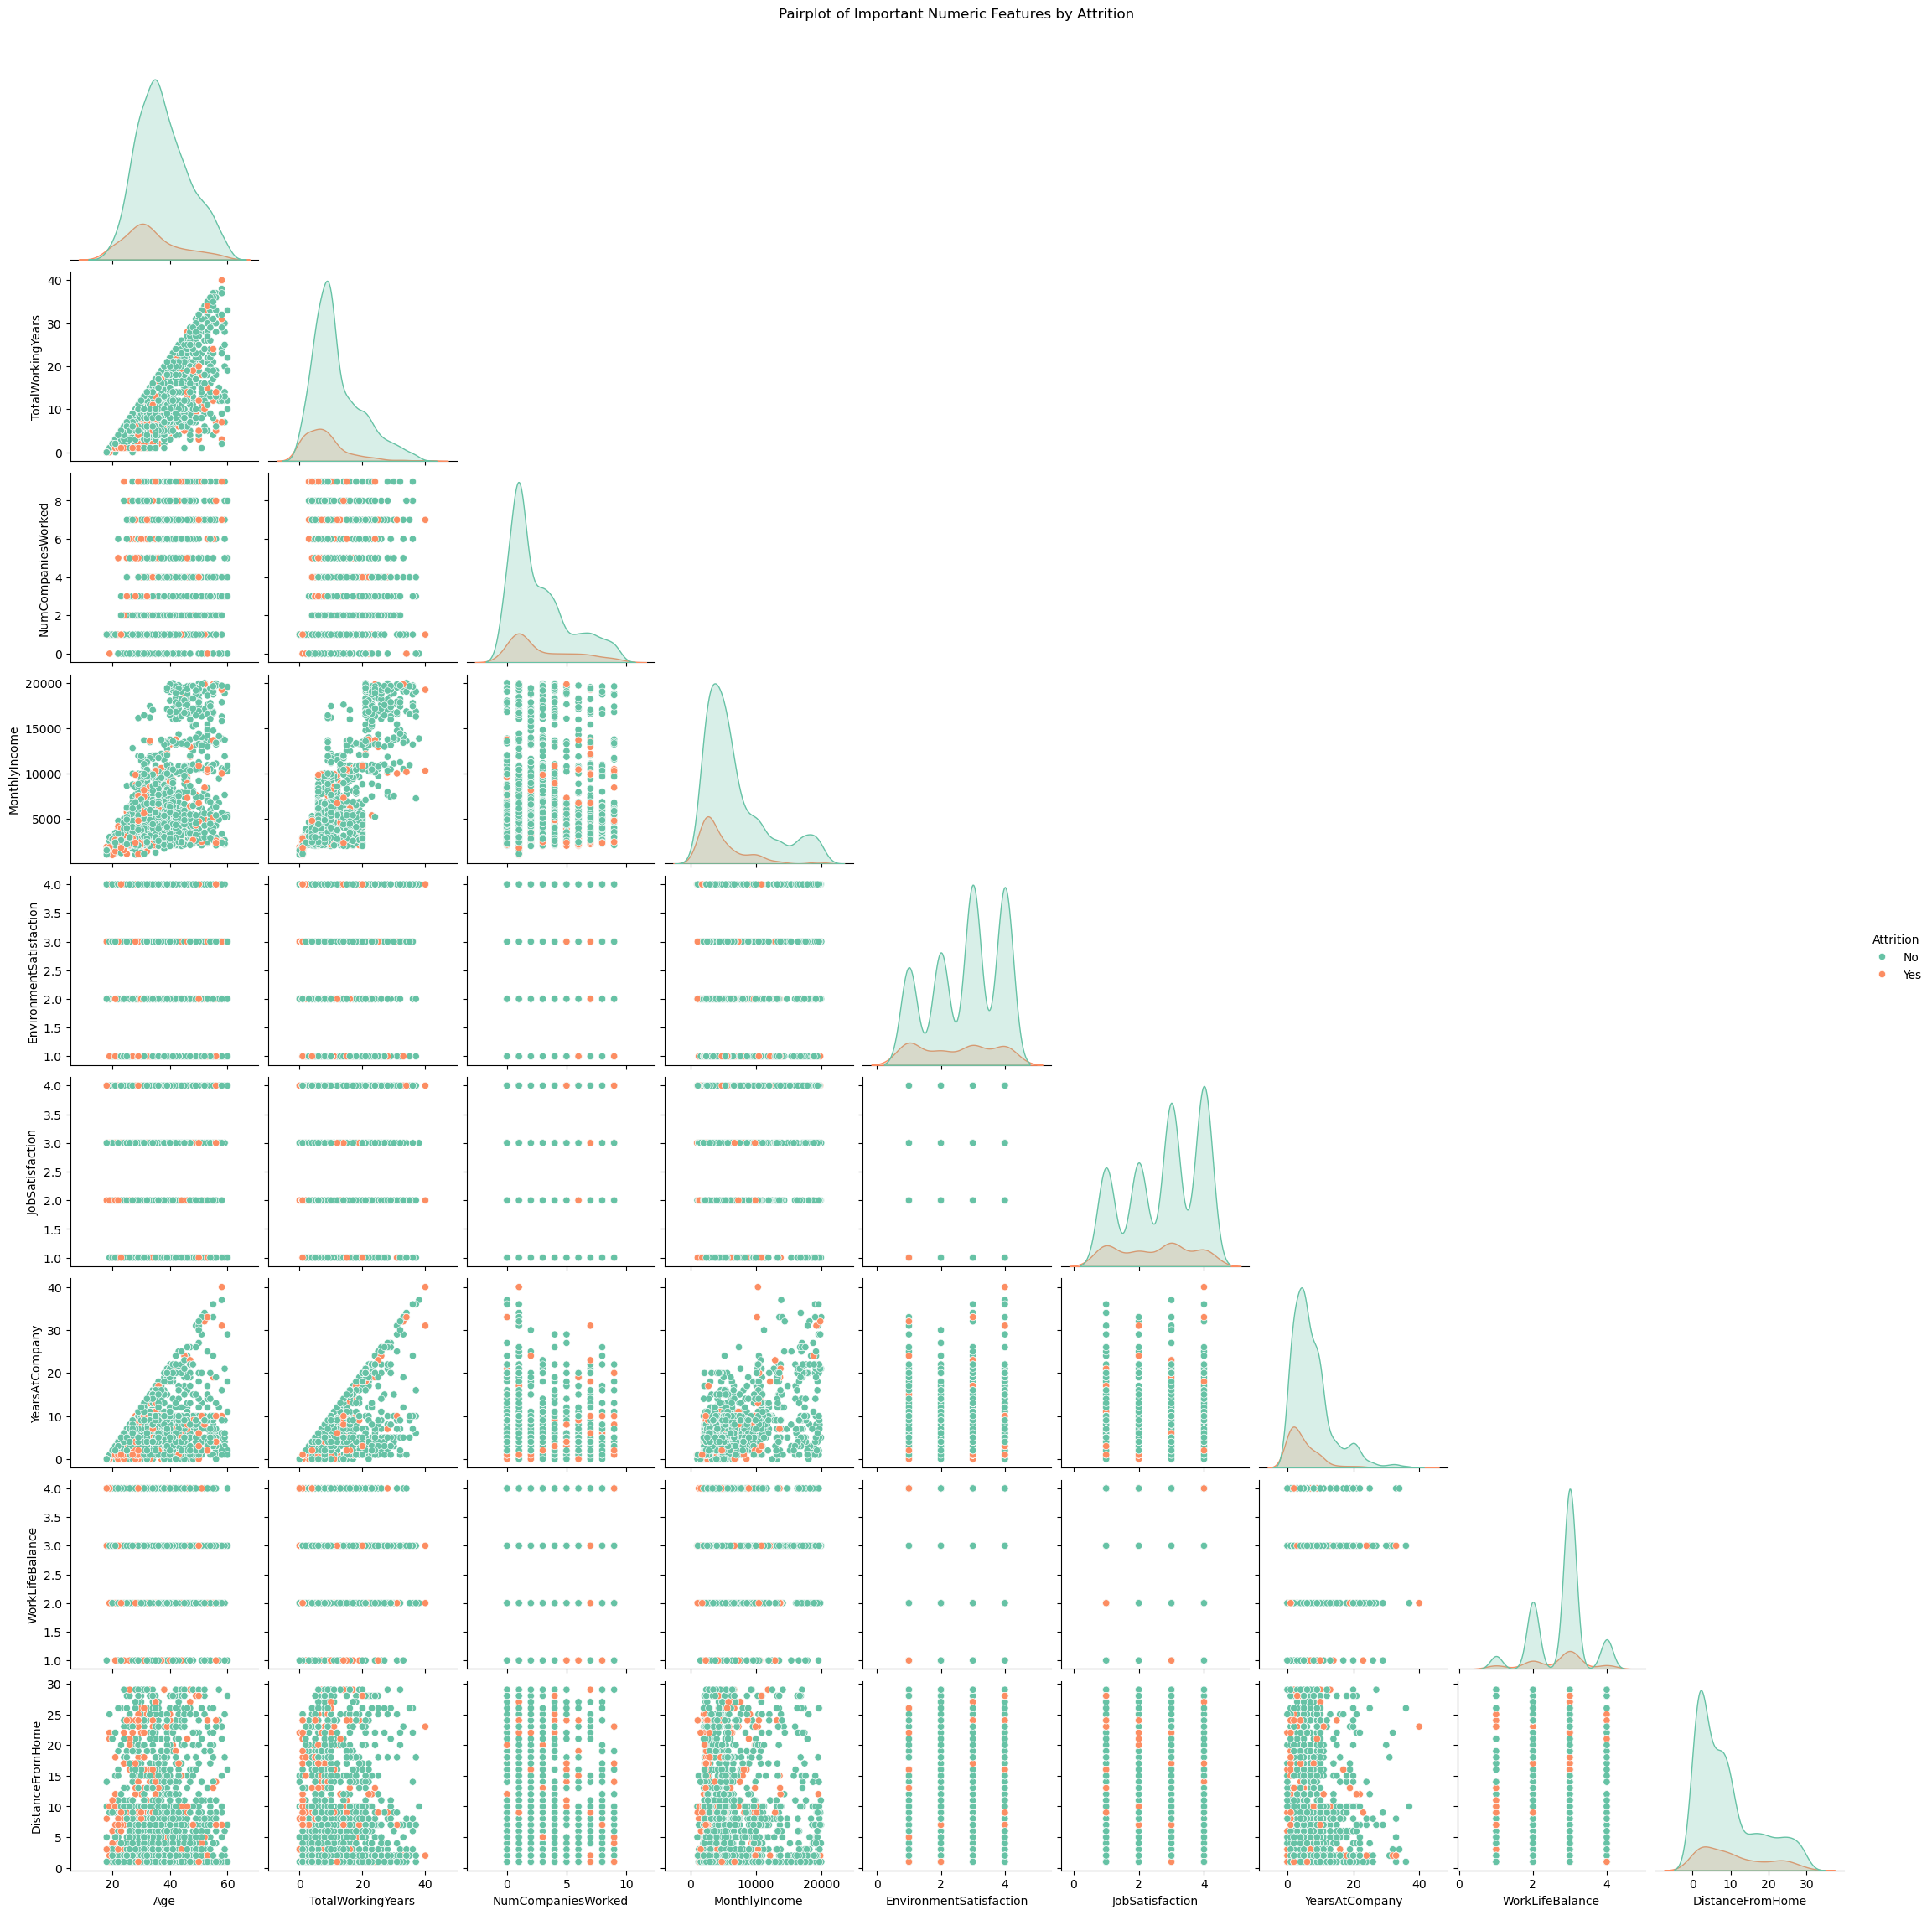

In [9]:
# Important numeric features based on logistic regression & domain knowledge
important_features = [
    'Age',
    'TotalWorkingYears',
    'NumCompaniesWorked',
    'MonthlyIncome',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'YearsAtCompany',
    'WorkLifeBalance',
    'DistanceFromHome'
]

# Convert Attrition to categorical if not already
df['Attrition'] = df['Attrition'].astype('category')

# Generate pairplot for the important features
sns.pairplot(
    df,
    vars=important_features,
    hue='Attrition',
    diag_kind='kde',
    palette='Set2',
    corner=True
)

plt.suptitle('Pairplot of Important Numeric Features by Attrition', y=1.02)
plt.savefig(IMAGES_PATH / 'PairPlot' /'pairplot_important_features.png', dpi=300, bbox_inches='tight')
plt.show()


# Dataset Preprocessing

## Setting Independant & Dependant Features

In [10]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [11]:
# Separating the Independent and Dependent Variables
columns_to_drop = [
    'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber',
    'JobLevel', 'Department', 'PerformanceRating', 'DailyRate', 
    'YearsWithCurrManager', 'Attrition','TrainingTimesLastYear'
]
X = df.drop(columns=columns_to_drop)
y = df['Attrition'].map({'Yes': 1, 'No': 0})

In [12]:
X.shape

(1470, 24)

In [13]:
X.head()

Age     BusinessTravel  DistanceFromHome  Education EducationField  \
0   41      Travel_Rarely                 1          2  Life Sciences   
1   49  Travel_Frequently                 8          1  Life Sciences   
2   37      Travel_Rarely                 2          2          Other   
3   33  Travel_Frequently                 3          4  Life Sciences   
4   27      Travel_Rarely                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0                        2  Female          94               3   
1                        3    Male          61               2   
2                        4    Male          92               2   
3                        4  Female          56               3   
4                        1    Male          40               3   

                 JobRole  ...  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        Sales Executive  ...                   8      Yes                 11   
1     Research Scientist  ...                   1       No                 23   
2  Laboratory Technician  ...                   6      Yes                 15   
3     Research Scientist  ...                   1      Yes                 11   
4  Laboratory Technician  ...                   9       No                 12   

   RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                         1                 0                 8   
1                         4                 1                10   
2                         2                 0                 7   
3                         3                 0                 8   
4                         4                 1                 6   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  
0                        0  
1                        1  
2                        0  
3                        3  
4                        2  

[5 rows x 24 columns]

## Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
X_train.head()

Age     BusinessTravel  DistanceFromHome  Education    EducationField  \
1194   47      Travel_Rarely                 2          4     Life Sciences   
128    22      Travel_Rarely                 2          1  Technical Degree   
810    46      Travel_Rarely                 3          1         Marketing   
478    25      Travel_Rarely                13          1           Medical   
491    43  Travel_Frequently                 9          5           Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
1194                        2  Female          47               4   
128                         3    Male         100               3   
810                         1    Male          52               3   
478                         2    Male          40               3   
491                         4    Male          72               3   

                    JobRole  ...  NumCompaniesWorked OverTime  \
1194                Manager  ...                   6       No   
128   Laboratory Technician  ...                   0       No   
810                 Manager  ...                   3       No   
478    Sales Representative  ...                   1       No   
491   Laboratory Technician  ...                   3      Yes   

      PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
1194                 14                         3                 3   
128                  14                         3                 1   
810                  12                         4                 1   
478                  11                         3                 0   
491                  13                         2                 1   

     TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1194                29                3               3                   2   
128                  3                3               2                   1   
810                 23                3              12                   9   
478                  7                3               7                   4   
491                 10                3               8                   7   

      YearsSinceLastPromotion  
1194                        1  
128                         2  
810                         4  
478                         0  
491                         4  

[5 rows x 24 columns]

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## One Hot Embedding for Catagorical attributes

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)


In [18]:
# Applying the preprocessor to X
X_transformed = preprocessor.fit_transform(X_train)

# Getting encoded column names from OneHotEncoder
encoded_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Getting remaining numerical feature names
numerical_features = [col for col in X_train.columns
                      if col not in categorical_features]

# Combining all column names
all_column_names = list(encoded_col_names) + numerical_features

# Converting the result into a DataFrame with column names
X_train = pd.DataFrame(X_transformed, columns=all_column_names)

# Transforming test set with the same fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)
X_test = pd.DataFrame(X_test_transformed, columns=all_column_names)

X_train.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               1.0                           0.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       1.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     1.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              1.0          1.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  ...  MonthlyRate  NumCompaniesWorked  \
0                            0.0  ...      21086.0                 6.0   
1                            1.0  ...      19299.0                 0.0   
2                            0.0  ...      15596.0                 3.0   
3                            0.0  ...      26376.0                 1.0   
4                            1.0  ...      19627.0                 3.0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0               14.0                       3.0               3.0   
1               14.0                       3.0               1.0   
2               12.0                       4.0               1.0   
3               11.0                       3.0               0.0   
4               13.0                       2.0               1.0   

   TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               29.0              3.0             3.0                 2.0   
1                3.0              3.0             2.0                 1.0   
2               23.0              3.0            12.0                 9.0   
3                7.0              3.0             7.0                 4.0   
4               10.0              3.0             8.0                 7.0   

   YearsSinceLastPromotion  
0                      1.0  
1                      2.0  
2                      4.0  
3                      0.0  
4                      4.0  

[5 rows x 37 columns]

In [19]:
X_test.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           1.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              0.0          0.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  ...  MonthlyRate  NumCompaniesWorked  \
0                            0.0  ...       7103.0                 1.0   
1                            0.0  ...      19982.0                 1.0   
2                            0.0  ...      25291.0                 9.0   
3                            0.0  ...      17477.0                 1.0   
4                            0.0  ...      21777.0                 0.0   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0               13.0                       3.0               1.0   
1               13.0                       4.0               1.0   
2               21.0                       3.0               1.0   
3               14.0                       4.0               2.0   
4               17.0                       1.0               1.0   

   TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1.0              3.0             1.0                 0.0   
1               10.0              3.0            10.0                 5.0   
2               10.0              2.0             5.0                 4.0   
3               26.0              2.0            25.0                 9.0   
4                2.0              2.0             1.0                 0.0   

   YearsSinceLastPromotion  
0                      0.0  
1                      7.0  
2                      0.0  
3                     14.0  
4                      0.0  

[5 rows x 37 columns]

In [20]:
X_train.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [21]:
# Checking for Missing Values
X_train.isnull().sum()

BusinessTravel_Travel_Frequently    0
BusinessTravel_Travel_Rarely        0
EducationField_Life Sciences        0
EducationField_Marketing            0
EducationField_Medical              0
EducationField_Other                0
EducationField_Technical Degree     0
Gender_Male                         0
JobRole_Human Resources             0
JobRole_Laboratory Technician       0
JobRole_Manager                     0
JobRole_Manufacturing Director      0
JobRole_Research Director           0
JobRole_Research Scientist          0
JobRole_Sales Executive             0
JobRole_Sales Representative        0
MaritalStatus_Married               0
MaritalStatus_Single                0
OverTime_Yes                        0
Age                                 0
DistanceFromHome                    0
Education                           0
EnvironmentSatisfaction             0
HourlyRate                          0
JobInvolvement                      0
JobSatisfaction                     0
MonthlyIncom

## Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 
             'MonthlyIncome','NumCompaniesWorked', 'StockOptionLevel','TotalWorkingYears',
             'WorkLifeBalance','YearsAtCompany','MonthlyRate','PercentSalaryHike',
             'RelationshipSatisfaction','YearsInCurrentRole','YearsSinceLastPromotion',
             'Education','HourlyRate','JobInvolvement']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

In [23]:
pd.set_option('display.max_columns', None) 

In [24]:
X_train.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               1.0                           0.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       1.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     1.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              1.0          1.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              1.0   
1                            1.0              0.0   
2                            0.0              1.0   
3                            0.0              0.0   
4                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           0.0                    0.0                   0.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    1.0                   0.0   
3                           1.0                    1.0                   0.0   
4                           0.0                    0.0                   0.0   

   OverTime_Yes       Age  DistanceFromHome  Education  \
0           0.0  0.690476          0.035714       0.75   
1           0.0  0.095238          0.035714       0.00   
2           0.0  0.666667          0.071429       0.00   
3           0.0  0.166667          0.428571       0.00   
4           1.0  0.595238          0.285714       1.00   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
0                 0.333333    0.242857        1.000000         0.333333   
1                 0.666667    1.000000        0.666667         1.000000   
2                 0.000000    0.314286        0.666667         0.666667   
3                 0.333333    0.142857        0.666667         0.666667   
4                 1.000000    0.600000        0.666667         0.666667   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.789021     0.762578            0.666667  

In [25]:
X_test.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           1.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              0.0          0.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            0.0              1.0   
3                            0.0              1.0   
4                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         1.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           1.0                    1.0                   0.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    0.0                   0.0   
3                           0.0                    0.0                   0.0   
4                           0.0                    1.0                   0.0   

   OverTime_Yes       Age  DistanceFromHome  Education  \
0           0.0  0.142857          0.428571       0.25   
1           0.0  0.619048          0.035714       0.00   
2           0.0  0.309524          0.214286       0.50   
3           0.0  0.619048          0.107143       0.25   
4           1.0  0.428571          0.285714       0.50   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
0                 1.000000    0.685714        0.666667         0.333333   
1                 0.000000    0.600000        1.000000         1.000000   
2                 0.666667    0.200000        0.333333         1.000000   
3                 0.666667    0.885714        1.000000         0.000000   
4                 1.000000    0.700000        0.333333         0.666667   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.053997     0.201124            0.111111  

# Finding Important Features Using Random Forest

                             feature  importance
26                     MonthlyIncome    0.085725
19                               Age    0.075962
32                 TotalWorkingYears    0.066662
27                       MonthlyRate    0.057396
23                        HourlyRate    0.057315
34                    YearsAtCompany    0.057165
20                  DistanceFromHome    0.055052
18                      OverTime_Yes    0.042968
28                NumCompaniesWorked    0.042796
29                 PercentSalaryHike    0.038905
35                YearsInCurrentRole    0.033418
22           EnvironmentSatisfaction    0.031827
33                   WorkLifeBalance    0.030892
25                   JobSatisfaction    0.030807
31                  StockOptionLevel    0.030395
24                    JobInvolvement    0.029753
36           YearsSinceLastPromotion    0.027604
30          RelationshipSatisfaction    0.026529
21                         Education    0.022181
0   BusinessTravel_T

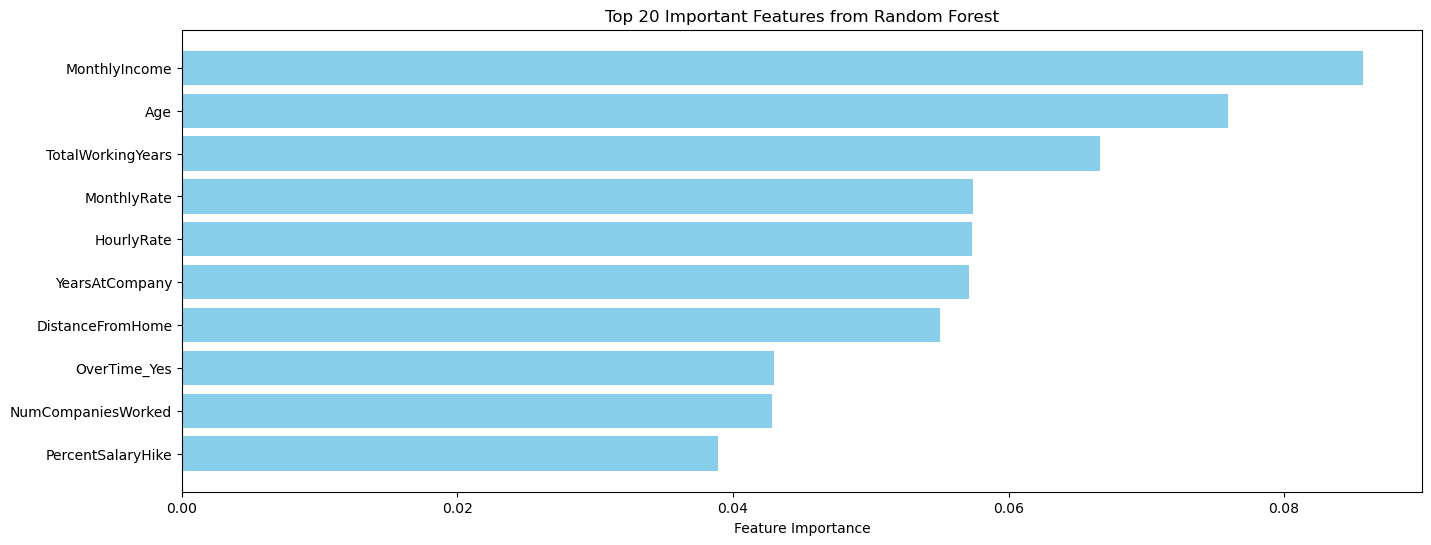

In [26]:
# Train a Random Forest classifier on your training data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to see features and their importance scores
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort features by importance descending
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Show the top 10 important features
print(feature_importances.head(20))

# Plot feature importances
plt.figure(figsize=(16,6))
plt.barh(feature_importances['feature'][:10][::-1], feature_importances['importance'][:10][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features from Random Forest')
plt.savefig(IMAGES_PATH /'important_features.png')
plt.show()

In [27]:
X_train.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               1.0                           0.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       1.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     1.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              1.0          1.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              1.0   
1                            1.0              0.0   
2                            0.0              1.0   
3                            0.0              0.0   
4                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           0.0                    0.0                   0.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    1.0                   0.0   
3                           1.0                    1.0                   0.0   
4                           0.0                    0.0                   0.0   

   OverTime_Yes       Age  DistanceFromHome  Education  \
0           0.0  0.690476          0.035714       0.75   
1           0.0  0.095238          0.035714       0.00   
2           0.0  0.666667          0.071429       0.00   
3           0.0  0.166667          0.428571       0.00   
4           1.0  0.595238          0.285714       1.00   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
0                 0.333333    0.242857        1.000000         0.333333   
1                 0.666667    1.000000        0.666667         1.000000   
2                 0.000000    0.314286        0.666667         0.666667   
3                 0.333333    0.142857        0.666667         0.666667   
4                 1.000000    0.600000        0.666667         0.666667   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.789021     0.762578            0.666667  

# Classification Report To Find the Best Model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier

top_features = [
    'MonthlyIncome', 'Age', 'MonthlyRate', 'HourlyRate','YearsAtCompany','DistanceFromHome','OverTime_Yes',
    'NumCompaniesWorked', 'PercentSalaryHike','EnvironmentSatisfaction', 'WorkLifeBalance', 'JobSatisfaction',
    'StockOptionLevel','JobInvolvement', 'TotalWorkingYears', 'YearsInCurrentRole',
    'Education','YearsSinceLastPromotion','RelationshipSatisfaction','BusinessTravel_Travel_Frequently'
]   
'''
excluded  'Gender_Male', 'MaritalStatus_Married', 'BusinessTravel_Travel_Rarely'
'''

# Select only these features for training and testing
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(), 
        'Decision Tree': DecisionTreeClassifier(), 
        'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'), 
        'SVC': SVC(random_state=20, probability=True), 
        'Random Forest': RandomForestClassifier(random_state=42), 
        'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
       # 'XGBoost': XGBClassifier()
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        predictions = classifier.predict(test_X)
        probabilities = classifier.predict_proba(test_X)[:,1] if hasattr(classifier, "predict_proba") else preds
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, probabilities)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results

### Using All the Features for Report 

In [29]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.850340   0.666667  0.127660  0.214286  0.694203
Decision Tree        0.809524   0.390244  0.340426  0.363636  0.619605
Logistic Regression  0.877551   0.761905  0.340426  0.470588  0.815143
SVC                  0.853741   0.833333  0.106383  0.188679  0.811267
Random Forest        0.843537   0.545455  0.127660  0.206897  0.784607
AdaBoost             0.840136   0.500000  0.191489  0.276923  0.796623


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


### Using only the Top Features for Report

In [30]:
results_top_features = evaluate_classifiers(X_train_top, y_train, X_test_top, y_test)
print(results_top_features)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.850340   0.578947  0.234043  0.333333  0.727108
Decision Tree        0.748299   0.254545  0.297872  0.274510  0.565940
Logistic Regression  0.880952   0.833333  0.319149  0.461538  0.810750
SVC                  0.877551   0.923077  0.255319  0.400000  0.806099
Random Forest        0.829932   0.400000  0.127660  0.193548  0.781506
AdaBoost             0.840136   0.500000  0.255319  0.338028  0.806572


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [31]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [46]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [47]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [48]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [49]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, n_estimators=600)

In [50]:
best_random_grid=rf_randomcv.best_estimator_

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
best_random_grid.fit(X_train, y_train)
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[241   6]
 [ 42   5]]
Accuracy Score 0.8367346938775511
Classification report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



In [52]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [54]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [55]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, min_samples_split=4,
                       n_estimators=500)

In [56]:
best_grid=grid_search.best_estimator_

In [57]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=120, min_samples_split=4,
                       n_estimators=500)

In [103]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[240   7]
 [ 43   4]]
Accuracy Score 0.8299319727891157
Classification report:               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



# Hyper Parameter Tuning Using All Model Except Decision Tree

## For Random Search Operation to Find The Best Range Value

In [59]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# For KNN
param_knn = {
    'n_neighbors': randint(3, 20), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# For Random Forest
param_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# For Logistic Regression
param_lr = {
    'C': np.logspace(-3, 3, 10),           # 0.001 to 1000
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# For SVC
param_svc = {
    'C': np.logspace(-2, 2, 10),            # 0.01 to 100
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

# For Adaboost
param_ab = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=2),
                       DecisionTreeClassifier(max_depth=3)]
}

In [60]:
# For Random Search
knn_random = RandomizedSearchCV(KNeighborsClassifier(), param_knn, n_iter=20, scoring='f1', cv=5, random_state=42)
rf_random = RandomizedSearchCV(RandomForestClassifier(), param_rf, n_iter=30, scoring='f1', cv=5, random_state=42)
lr_random = RandomizedSearchCV(LogisticRegression(), param_lr, n_iter=20, scoring='f1', cv=5, random_state=42)
svc_random = RandomizedSearchCV(SVC(), param_svc, n_iter=20, scoring='f1', cv=5, random_state=42)
ab_random = RandomizedSearchCV(AdaBoostClassifier(), param_ab, n_iter=20, scoring='f1', cv=5, random_state=42)


In [61]:
# For KNN
knn_random.fit(X_train_top, y_train)

print(knn_random.best_params_)
print(knn_random.best_score_)

{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
0.30310714285714285


In [62]:
# For Random Forest
rf_random.fit(X_train_top, y_train)

print(rf_random.best_params_)
print(rf_random.best_score_)

{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 130}
0.3440988253431585


In [63]:
# For Logistic Regression
lr_random.fit(X_train_top, y_train)

print(lr_random.best_params_)
print(lr_random.best_score_)

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': np.float64(1000.0)}
0.44240813830977765


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~~~~~~~

In [64]:
# For SVC
svc_random.fit(X_train_top, y_train)

print(svc_random.best_params_)
print(svc_random.best_score_)

{'kernel': 'rbf', 'gamma': 0.1, 'class_weight': 'balanced', 'C': np.float64(1.6681005372000592)}
0.5294125318198355


In [65]:
# For AdaBoost
ab_random.fit(X_train_top, y_train)

print(ab_random.best_params_)
print(ab_random.best_score_)

{'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1, 'n_estimators': 152}
0.4562553925798102


## GridSearch To Find the Fine Tuned Parameter

In [66]:
# ================== 1️⃣ KNN ==================
param_knn_grid = {
    'n_neighbors': [3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_knn_grid, scoring='f1', cv=5)

# ================== 2️⃣ Random Forest ==================
param_rf_grid = {
    'n_estimators': [110, 122, 130],
    'max_depth': [25, 30, 35],
    'min_samples_split': [5, 6, 7],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_rf_grid, scoring='f1', cv=5)

# ================== 3️⃣ Logistic Regression ==================
param_lr_grid = {
    'C': [500, 1000, 1500],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [500]
}
lr_grid = GridSearchCV(LogisticRegression(), param_lr_grid, scoring='f1', cv=5)

# ================== 4️⃣ SVC ==================
param_svc_grid = {
    'C': [1.5, 1.668, 1.8],
    'kernel': ['rbf'],
    'gamma': [0.05, 0.1, 0.2],
    'class_weight': ['balanced']
}
svc_grid = GridSearchCV(SVC(), param_svc_grid, scoring='f1', cv=5)

# ================== 5️⃣ AdaBoost ==================
param_ab_grid = {
    'n_estimators': [140, 150, 160],
    'learning_rate': [1],
    'estimator': [DecisionTreeClassifier(max_depth=1)]
}
ab_grid = GridSearchCV(AdaBoostClassifier(), param_ab_grid, scoring='f1', cv=5)

In [67]:
# ================== Fitting Grids ==================
# Example for KNN
knn_grid.fit(X_train_top, y_train)
print("KNN Best Params:", knn_grid.best_params_)
print("KNN Best F1 Score:", knn_grid.best_score_)

# Repeat for other models
rf_grid.fit(X_train_top, y_train)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best F1 Score:", rf_grid.best_score_)

lr_grid.fit(X_train_top, y_train)
print("Logistic Regression Best Params:", lr_grid.best_params_)
print("Logistic Regression Best F1 Score:", lr_grid.best_score_)

svc_grid.fit(X_train_top, y_train)
print("SVC Best Params:", svc_grid.best_params_)
print("SVC Best F1 Score:", svc_grid.best_score_)

ab_grid.fit(X_train_top, y_train)
print("AdaBoost Best Params:", ab_grid.best_params_)
print("AdaBoost Best F1 Score:", ab_grid.best_score_)

KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
KNN Best F1 Score: 0.33493968050923595
Random Forest Best Params: {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 122}
Random Forest Best F1 Score: 0.35266468847704546
Logistic Regression Best Params: {'C': 500, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Best F1 Score: 0.44240813830977765
SVC Best Params: {'C': 1.8, 'class_weight': 'balanced', 'gamma': 0.2, 'kernel': 'rbf'}
SVC Best F1 Score: 0.5402657347305132
AdaBoost Best Params: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1, 'n_estimators': 160}
AdaBoost Best F1 Score: 0.4659905529313699


## Evaluating Parameter Tuned Classification Report

In [68]:
def evaluate_tuned_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform'), 
        'Logistic Regression': LogisticRegression(C=500, penalty='l1', solver='saga', max_iter=500),
        'SVC': SVC(C=1.8, kernel='rbf', gamma=0.2, class_weight='balanced', probability=True, random_state=20),
        'Random Forest': RandomForestClassifier(
            bootstrap=True, max_depth=25, max_features=None,
            min_samples_leaf=4, min_samples_split=6, n_estimators=122, random_state=42
        ),
        'AdaBoost': AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            learning_rate=1, n_estimators=160, algorithm='SAMME', random_state=42
        ),
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        predictions = classifier.predict(test_X)
        
        # Use predict_proba if available, else decision_function if exists, else fallback to predictions
        if hasattr(classifier, "predict_proba"):
            probabilities = classifier.predict_proba(test_X)[:,1]
        elif hasattr(classifier, "decision_function"):
            probabilities = classifier.decision_function(test_X)
        else:
            probabilities = predictions
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, probabilities)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results


In [69]:
results_top_features = evaluate_tuned_classifiers(X_train_top, y_train, X_test_top, y_test)
print(results_top_features)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.836735   0.473684  0.191489  0.272727  0.691403
Logistic Regression  0.874150   0.727273  0.340426  0.463768  0.808166
SVC                  0.775510   0.382716  0.659574  0.484375  0.814540
Random Forest        0.840136   0.500000  0.255319  0.338028  0.765527
AdaBoost             0.850340   0.565217  0.276596  0.371429  0.811956


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


### When Accuracy Matters More

Accuracy is more important when:

- Classes are roughly balanced.  
- False positives and false negatives have similar cost.  
- You care about overall correct predictions, not just the positives.


### HR Attrition Dataset

✅ **Interpretation:**

Since the positive class(Yes) is small, **highest recall is likely important** — we don’t want to miss positive cases.  

**SVC’s higher recall makes it more suitable** even if overall accuracy drops.


## Furthure Tuning SVC for Better Accuracy

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# --- Pipeline with scaling ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=20))
])

# --- Hyperparameter grid ---
param_grid = {
    'svc__C': [0.5, 1, 1.5, 1.8, 2, 5],
    'svc__gamma': [0.1, 0.2, 0.3, 0.5],
    'svc__kernel': ['rbf'],
    'svc__class_weight': ['balanced', None]
}

# --- Stratified CV ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Grid Search optimizing F1 (you can also try 'accuracy') ---
grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=1)
grid.fit(X_train_top, y_train)

# --- Best parameters ---
print("Best Params:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

# --- Evaluate on test set ---
best_model = grid.best_estimator_
y_probs = best_model.predict_proba(X_test_top)[:, 1]
y_pred_default = best_model.predict(X_test_top)

# --- Default metrics ---
accuracy = accuracy_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
roc_auc = roc_auc_score(y_test, y_probs)

print("\nMetrics with default threshold 0.5:")
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# --- Threshold tuning to improve accuracy ---
thresholds = np.arange(0.4, 0.7, 0.05)
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_s = f1_score(y_test, y_pred_thresh)
    print(f"Threshold {t:.2f} -> Accuracy: {acc:.4f}, Recall: {rec:.4f}, F1: {f1_s:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'svc__C': 0.5, 'svc__class_weight': 'balanced', 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best F1 Score (CV): 0.5145773858643969

Metrics with default threshold 0.5:
Accuracy: 0.8095, Recall: 0.4894, F1: 0.4510, ROC AUC: 0.8085
Threshold 0.40 -> Accuracy: 0.8537, Recall: 0.4043, F1: 0.4691
Threshold 0.45 -> Accuracy: 0.8605, Recall: 0.3404, F1: 0.4384
Threshold 0.50 -> Accuracy: 0.8639, Recall: 0.3191, F1: 0.4286
Threshold 0.55 -> Accuracy: 0.8571, Recall: 0.2553, F1: 0.3636
Threshold 0.60 -> Accuracy: 0.8503, Recall: 0.1915, F1: 0.2903
Threshold 0.65 -> Accuracy: 0.8537, Recall: 0.1702, F1: 0.2712


## Furthure Tuning Logistic Regression for Highest Recall

In [72]:
# Pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=500, random_state=42))
])

# Hyperparameter grid
param_grid = {
    'logreg__C': [0.1, 1, 10, 100, 500],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': ['balanced', None]
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search optimizing Recall
grid = GridSearchCV(pipeline, param_grid, scoring='recall', cv=cv, n_jobs=-1, verbose=1)
grid.fit(X_train_top, y_train)

# Best model
best_model = grid.best_estimator_
y_probs = best_model.predict_proba(X_test_top)[:,1]

# Default threshold metrics
y_pred_default = best_model.predict(X_test_top)
print("Default Threshold 0.5 Metrics:")
print("Recall:", recall_score(y_test, y_pred_default))
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1:", f1_score(y_test, y_pred_default))

# Threshold tuning
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    print(f"Threshold {t} -> Recall: {recall_score(y_test, y_pred_thresh):.4f}, Accuracy: {accuracy_score(y_test, y_pred_thresh):.4f}, F1: {f1_score(y_test, y_pred_thresh):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Default Threshold 0.5 Metrics:
Recall: 0.7446808510638298
Accuracy: 0.7482993197278912
F1: 0.4861111111111111
Threshold 0.3 -> Recall: 0.8723, Accuracy: 0.5442, F1: 0.3796
Threshold 0.35 -> Recall: 0.8511, Accuracy: 0.6020, F1: 0.4061
Threshold 0.4 -> Recall: 0.8298, Accuracy: 0.6531, F1: 0.4333
Threshold 0.45 -> Recall: 0.8085, Accuracy: 0.7109, F1: 0.4720
Threshold 0.5 -> Recall: 0.7447, Accuracy: 0.7483, F1: 0.4861


# Shuffle Split/ Repeated Random train-test splits On Logistic Regression

In [73]:
def shuffle_split_evaluate(model, X, y, n_splits=10, test_size=0.2, threshold=0.5, random_state=42):

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    
    accuracies, precisions, recalls, f1s, roc_aucs = [], [], [], [], []

    for train_idx, test_idx in ss.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Fit model
        model.fit(X_train, y_train)
        
        # Predict probabilities and apply threshold
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = (y_probs >= threshold).astype(int)
        
        # Metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        roc_aucs.append(roc_auc_score(y_test, y_probs))
    
    # Print mean ± std
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")
    print(f"ROC AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")

In [74]:
logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='saga', penalty='l1', C=500, class_weight='balanced', max_iter=500, random_state=42
    ))
])

In [76]:
from sklearn.model_selection import ShuffleSplit
shuffle_split_evaluate(logreg_model, X_train_top.values, y_train.values, n_splits=15, threshold=0.48)

Threshold: 0.48
Accuracy: 0.7316 ± 0.0192
Precision: 0.3538 ± 0.0380
Recall: 0.8031 ± 0.0582
F1 Score: 0.4899 ± 0.0420
ROC AUC: 0.8300 ± 0.0318


# Training Our Model 

## Logistic Regression(Threshold 0.48)

In [77]:
def train_evaluate_logistic(X_train, y_train, X_test, y_test, threshold=0.48):
    """
    Train Logistic Regression with tuned hyperparameters,
    predict using a custom threshold, and evaluate metrics.
    """
    # --- Step 1: Define pipeline with scaling ---
    logreg_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            solver='saga',
            penalty='l1',
            C=500,
            class_weight='balanced',
            max_iter=500,
            random_state=42
        ))
    ])
    
    # --- Step 2: Fit model ---
    logreg_pipeline.fit(X_train, y_train)
    
    # --- Step 3: Predict probabilities ---
    y_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
    
    # --- Step 4: Apply threshold ---
    y_pred_thresh = (y_probs >= threshold).astype(int)
    
    # --- Step 5: Evaluate ---
    accuracy = accuracy_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    # --- Step 6: Print metrics ---
    print(f"Logistic Regression with Threshold {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return logreg_pipeline, y_pred_thresh, y_probs

## Training Model

In [78]:
logreg_model, y_pred, y_probs = train_evaluate_logistic(X_train_top, y_train, X_test_top, y_test)

Logistic Regression with Threshold 0.48
Accuracy: 0.7449
Recall: 0.7872
F1 Score: 0.4966
ROC AUC: 0.8164


## Saving The Model

In [79]:
import joblib

# Save the trained model to a file
joblib_file = "LR Trained Model For HR Employee Attrition/logistic_model_threshold48.pkl"
joblib.dump(logreg_model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to LR Trained Model For HR Employee Attrition/logistic_model_threshold48.pkl


# Stacking Ensemble With Logistic Regression


🔹 Stacking Ensemble (LR as Meta-Model) Results
Accuracy: 0.7959183673469388
Precision: 0.4084507042253521
Recall: 0.6170212765957447
F1 Score: 0.4915254237288136
ROC AUC: 0.8067016969592558

Confusion Matrix:
 [[205  42]
 [ 18  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       247
           1       0.41      0.62      0.49        47

    accuracy                           0.80       294
   macro avg       0.66      0.72      0.68       294
weighted avg       0.84      0.80      0.81       294



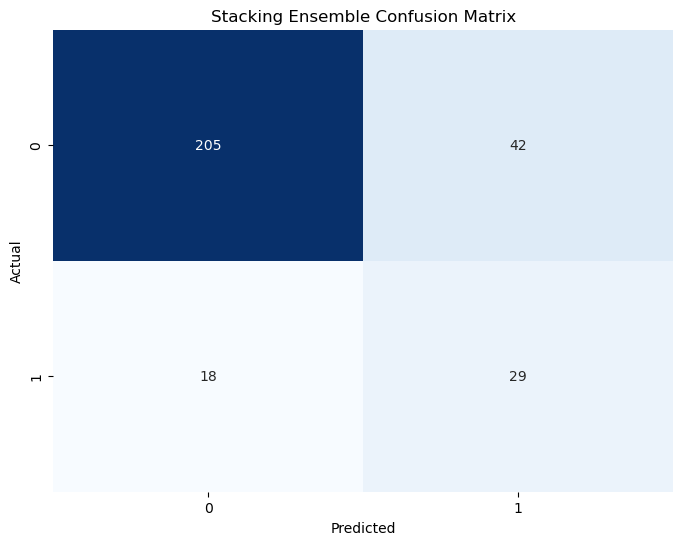

Stacking model saved to LR_Stacking_Model/stacking_logistic_model.pkl


In [96]:
 #NEW: Add Stacking Ensemble with Logistic Regression
# ==========================================================
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Base models (tuned from our code)
base_learners = [
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')), 
    ('rf', RandomForestClassifier(
        bootstrap=True, max_depth=25, max_features=None,
        min_samples_leaf=4, min_samples_split=6,
        n_estimators=122, random_state=42
    )),
    ('svc', SVC(C=1.8, kernel='rbf', gamma=0.2,
                class_weight='balanced', probability=True, random_state=20))
]

# Final model = Logistic Regression (our decided model)
final_lr = LogisticRegression(
    solver='saga',
    penalty='l1',
    C=500,
    class_weight='balanced',
    max_iter=500,
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_lr,
    cv=5,
    n_jobs=-1
)

# Train stacking
stacking_model.fit(X_train_top, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test_top)
y_probs_stack = stacking_model.predict_proba(X_test_top)[:, 1]

# Evaluation
print("\n🔹 Stacking Ensemble (LR as Meta-Model) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_test, y_probs_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# ADD THE CONFUSION MATRIX PLOT HERE
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Ensemble Confusion Matrix')
plt.show()

# Create directory if it doesn't exist
os.makedirs("LR_Stacking_Model", exist_ok=True)

# Save stacking model
joblib_file = "LR_Stacking_Model/stacking_logistic_model.pkl"
joblib.dump(stacking_model, joblib_file)
print(f"Stacking model saved to {joblib_file}")

## Loading the Saved Model

In [85]:
# Load the model from file
loaded_model = joblib.load(joblib_file)

# Example: predict probabilities on new data
y_probs_new = loaded_model.predict_proba(X_test_top)[:, 1]

# Apply threshold 0.48
threshold = 0.48
y_pred_new = (y_probs_new >= threshold).astype(int)

print("Predictions with loaded model:", y_pred_new[:10])  # first 10 predictions


Predictions with loaded model: [1 0 0 0 1 1 0 1 0 1]


# XAI using LIME

In [86]:
!pip install -U lime

In [87]:
import lime
import lime.lime_tabular

In [88]:
X_train.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [89]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)

In [92]:
from sklearn.tree import DecisionTreeClassifier

# Define and train your decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
exp = explainer.explain_instance(X_test.iloc[1], dt.predict_proba)
exp.show_in_notebook(show_table = True)

D:\Anaconda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
D:\Anaconda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
D:\Anaconda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (

In [93]:
X_test.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                           1.0                       0.0   
1                           1.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           0.0                       0.0   

   EducationField_Medical  EducationField_Other  \
0                     0.0                   0.0   
1                     0.0                   0.0   
2                     0.0                   0.0   
3                     0.0                   0.0   
4                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Male  JobRole_Human Resources  \
0                              0.0          0.0                      0.0   
1                              0.0          0.0                      0.0   
2                              0.0          1.0                      0.0   
3                              0.0          1.0                      0.0   
4                              0.0          1.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            0.0              1.0   
3                            0.0              1.0   
4                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         1.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           1.0                    1.0                   0.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    0.0                   0.0   
3                           0.0                    0.0                   0.0   
4                           0.0                    1.0                   0.0   

   OverTime_Yes       Age  DistanceFromHome  Education  \
0           0.0  0.142857          0.428571       0.25   
1           0.0  0.619048          0.035714       0.00   
2           0.0  0.309524          0.214286       0.50   
3           0.0  0.619048          0.107143       0.25   
4           1.0  0.428571          0.285714       0.50   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
0                 1.000000    0.685714        0.666667         0.333333   
1                 0.000000    0.600000        1.000000         1.000000   
2                 0.666667    0.200000        0.333333         1.000000   
3                 0.666667    0.885714        1.000000         0.000000   
4                 1.000000    0.700000        0.333333         0.666667   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.053997     0.201124            0.111111  

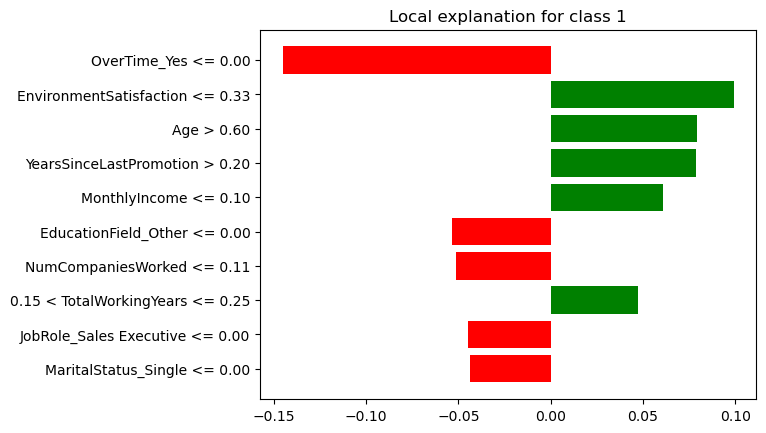

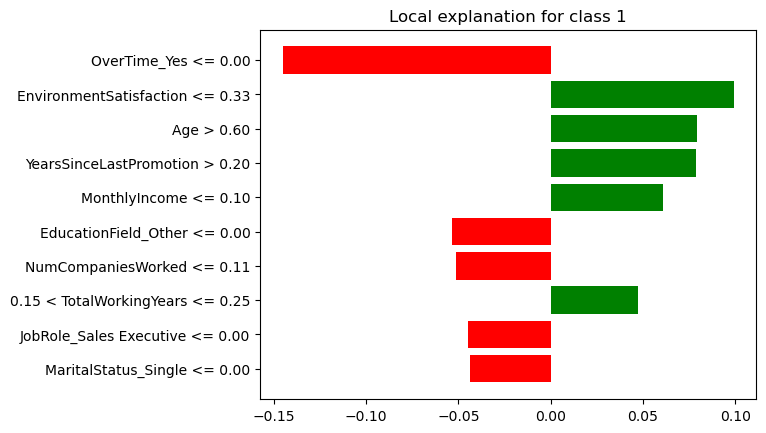

In [94]:
exp.as_pyplot_figure()